<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [81]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-02-07 17:56:20--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  59.0MB/s    in 3.5s    

2025-02-07 17:56:24 (57.3 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [82]:
!pip install pandas

In [83]:
!pip install matplotlib

In [84]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [85]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [86]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [87]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [88]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


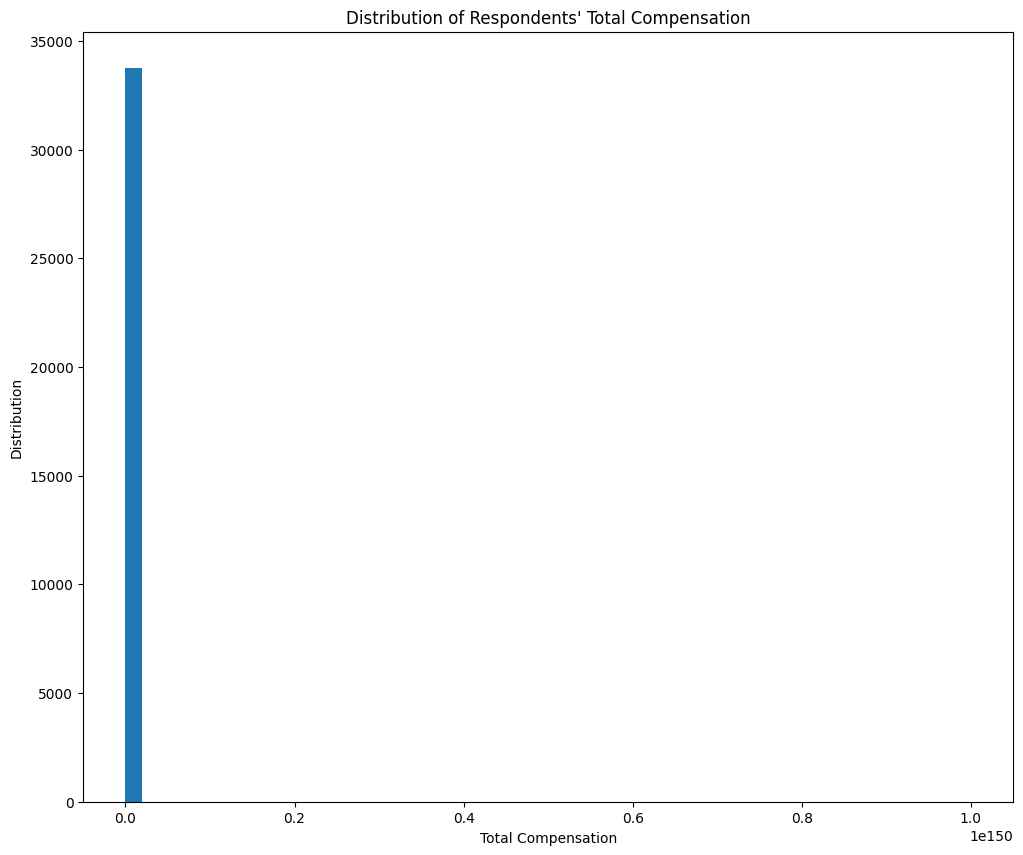

In [106]:
QUERY2 = """
SELECT CompTotal 
FROM main 
WHERE CompTotal is NOT NULL
""" 

df2 = pd.read_sql_query(QUERY2, conn) 

plt.figure(figsize = (12,10)) 
plt.hist(df2, bins = 50) 

plt.xlabel("Total Compensation") 
plt.ylabel("Distribution") 
plt.title("Distribution of Respondents' Total Compensation") 
plt.show()

In [104]:
df2.max() 

CompTotal    1.000000e+150
dtype: float64

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


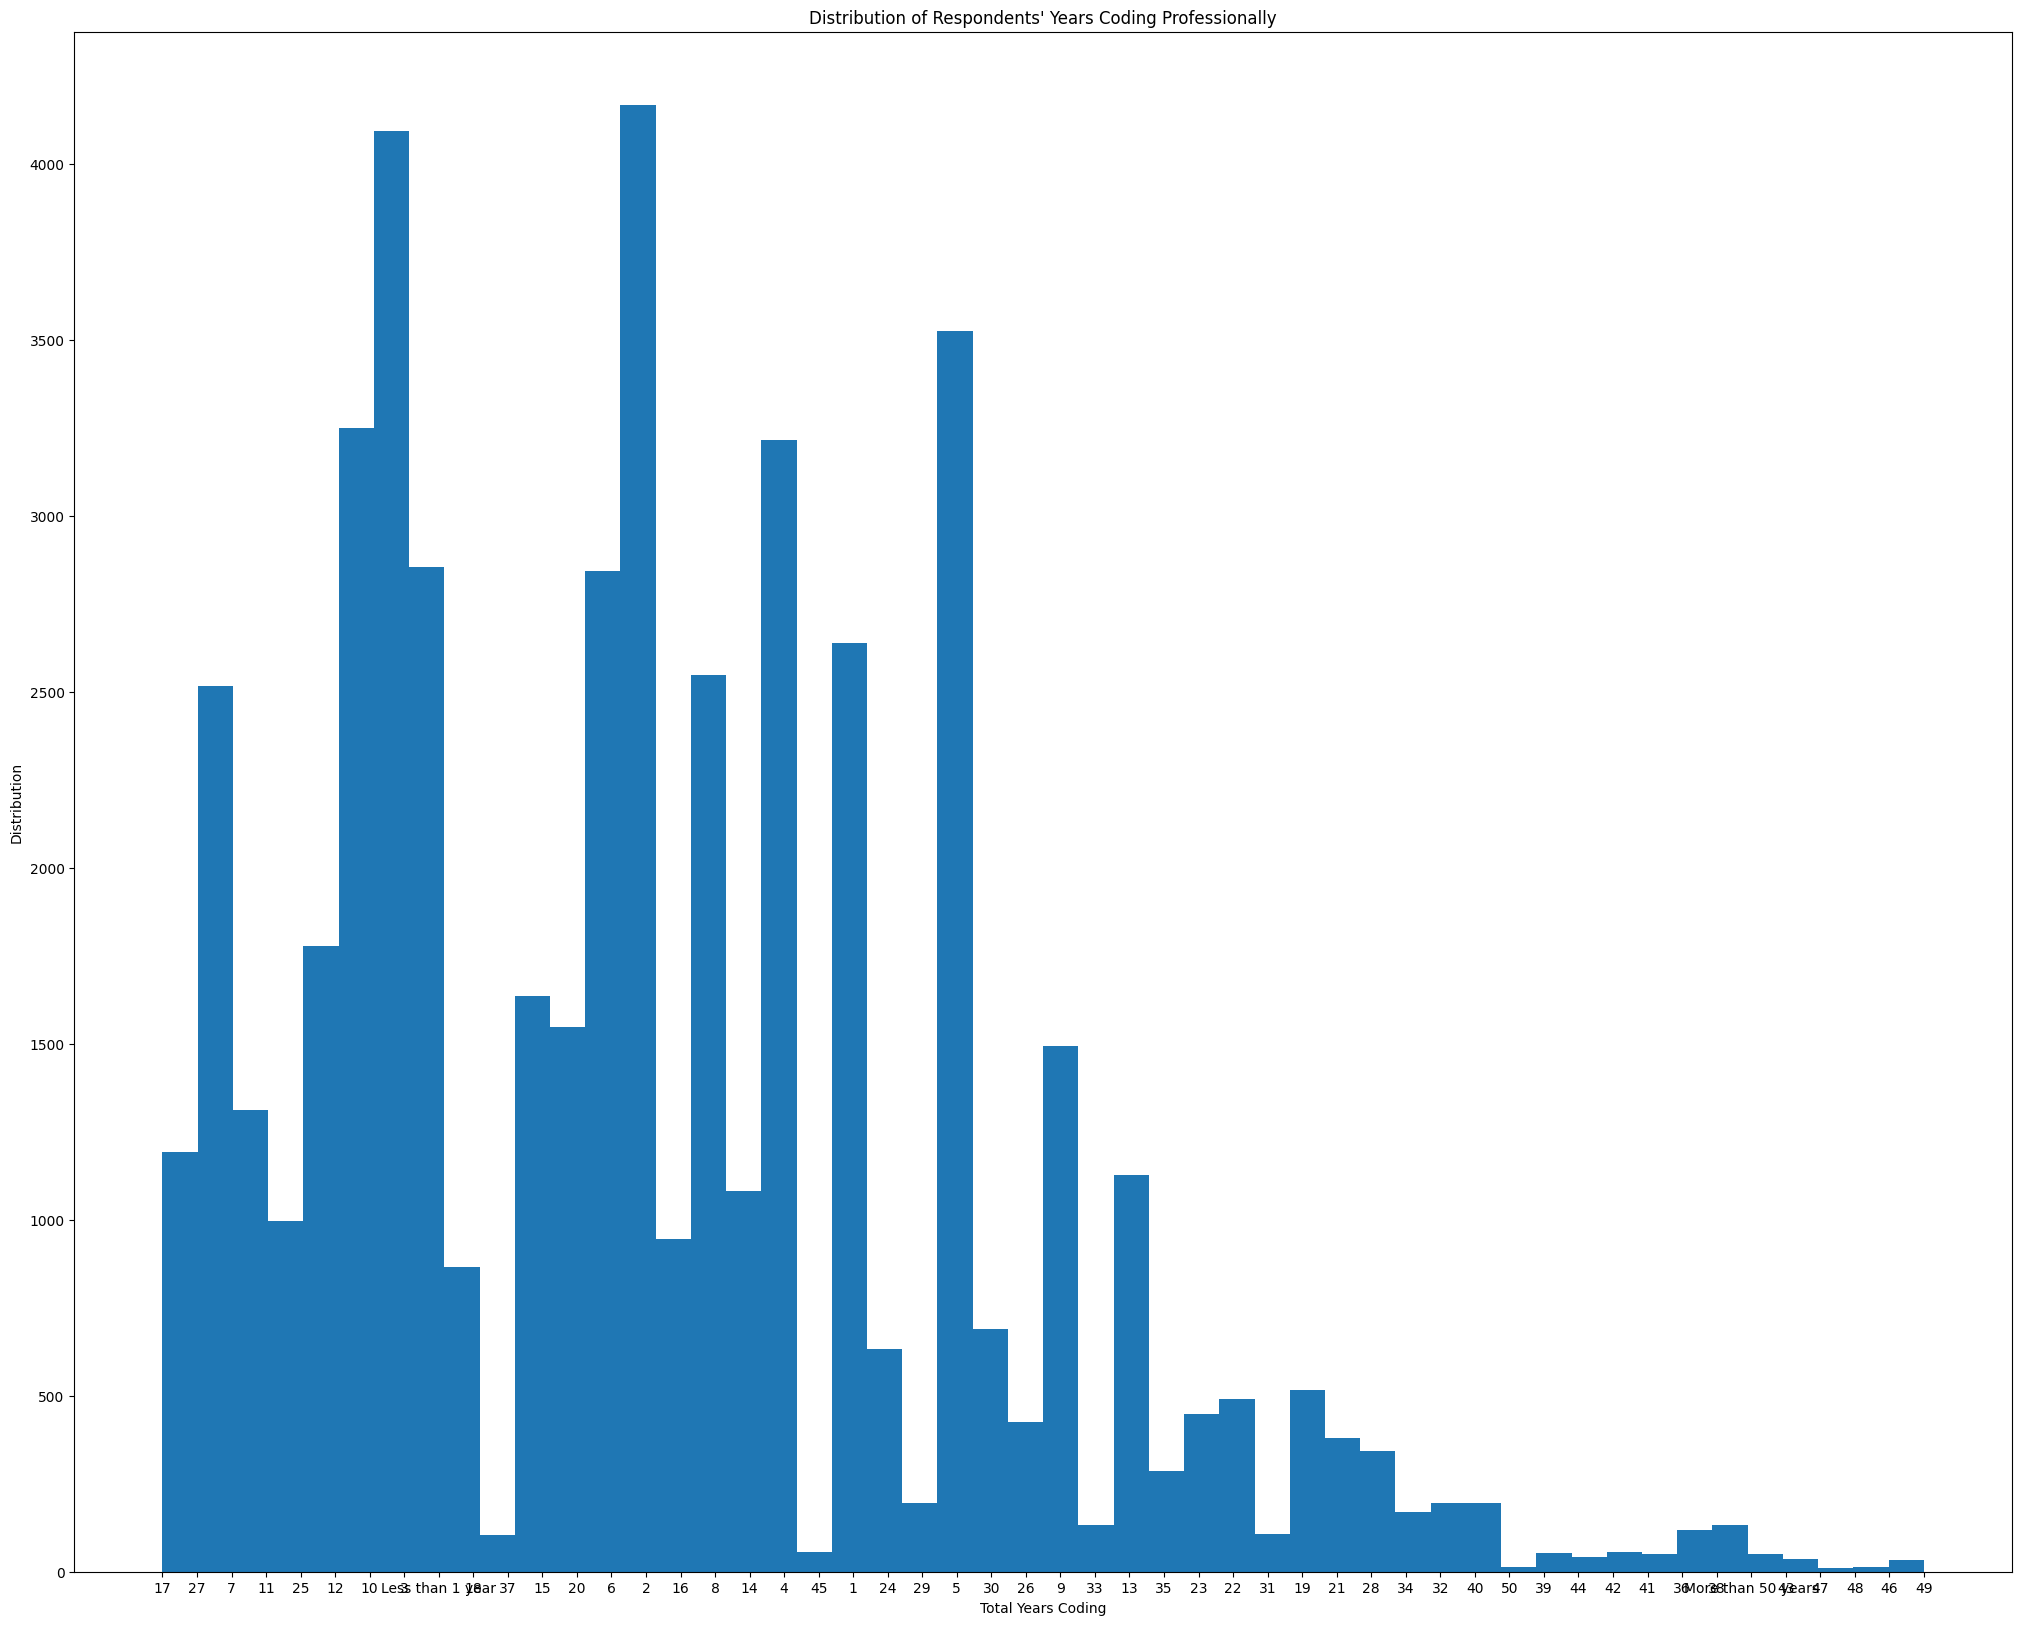

In [90]:
QUERY3 = """
SELECT YearsCodePro 
FROM main 
WHERE YearsCodePro is NOT NULL
""" 

df3 = pd.read_sql_query(QUERY3, conn) 

plt.figure(figsize = (25,20)) 
plt.hist(df3, bins = 50) 

plt.xlabel("Total Years Coding") 
plt.ylabel("Distribution") 
plt.title("Distribution of Respondents' Years Coding Professionally") 
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


   CompTotal              Age
0  2040000.0  18-24 years old
1    50000.0  18-24 years old
2  1140000.0  18-24 years old
3     6000.0  18-24 years old
4    36000.0  18-24 years old


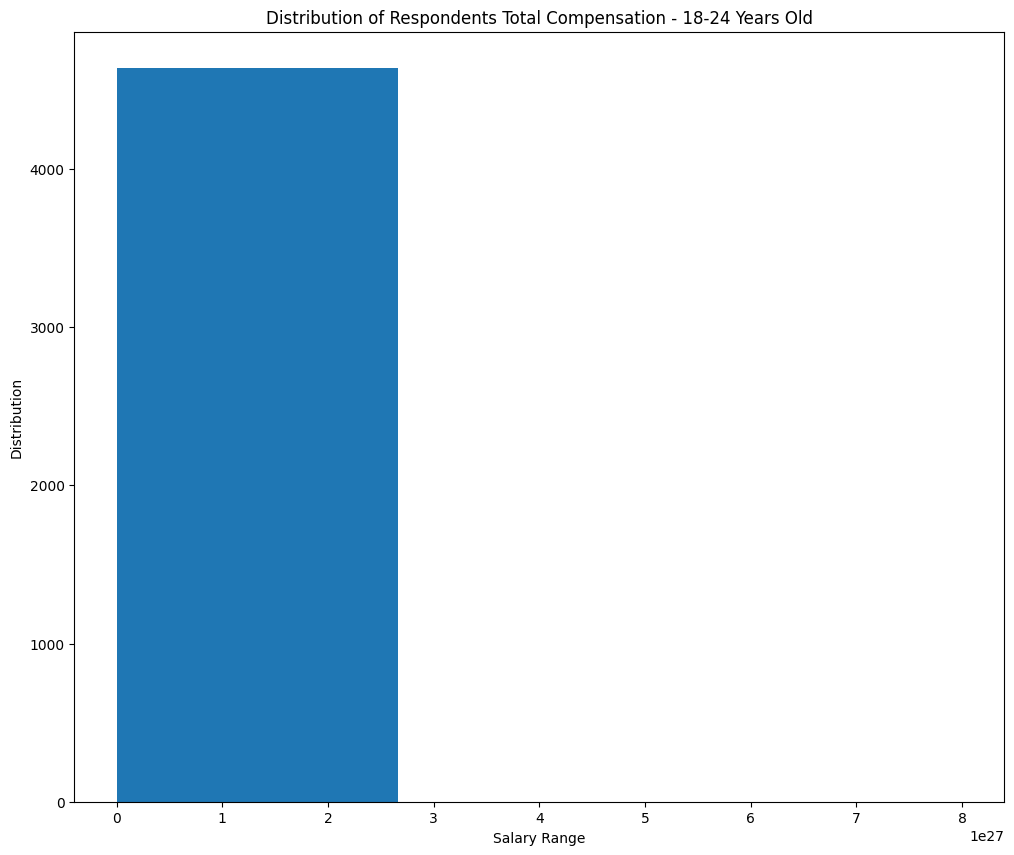

In [91]:
QUERY4 = """SELECT CompTotal, Age 
FROM main 
WHERE CompTotal is NOT NULL 
AND Age == '18-24 years old'
""" 

df4 = pd.read_sql_query(QUERY4, conn) 

print (df4.head())

plt.figure(figsize = (12,10)) 
plt.hist(df4['CompTotal'], bins = 3) 

plt.xlabel("Salary Range") 
plt.ylabel("Distribution") 
plt.title("Distribution of Respondents Total Compensation - 18-24 Years Old") 
plt.show()

   CompTotal              Age
0    28000.0  25-34 years old
1   110000.0  25-34 years old
2    27000.0  25-34 years old
3    62000.0  25-34 years old
4   230000.0  25-34 years old


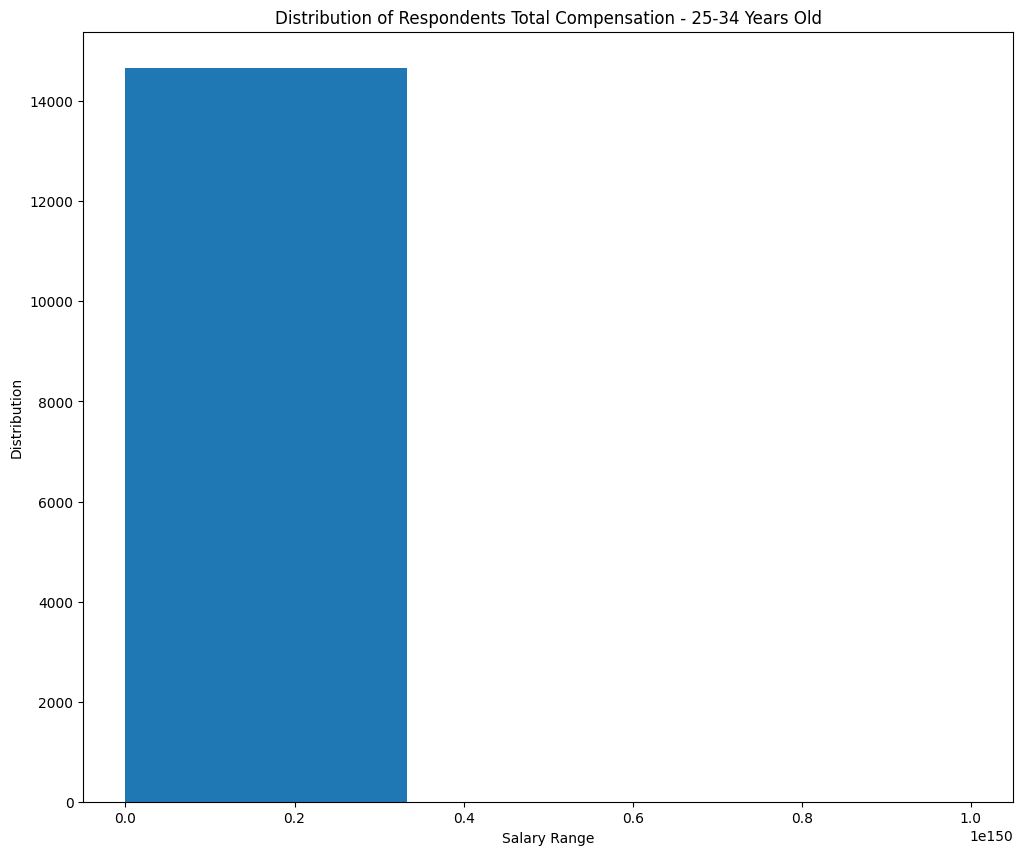

In [92]:
QUERY5 = """
SELECT CompTotal, Age 
FROM main 
WHERE CompTotal is NOT NULL 
AND Age == '25-34 years old'
""" 

df5 = pd.read_sql_query(QUERY5, conn) 

print (df5.head())

plt.figure(figsize = (12,10)) 
plt.hist(df5['CompTotal'], bins = 3) 

plt.xlabel("Salary Range") 
plt.ylabel("Distribution") 
plt.title("Distribution of Respondents Total Compensation - 25-34 Years Old") 
plt.show()

   CompTotal              Age
0    85000.0  35-44 years old
1    50000.0  35-44 years old
2   126420.0  35-44 years old
3    35000.0  35-44 years old
4    74000.0  35-44 years old


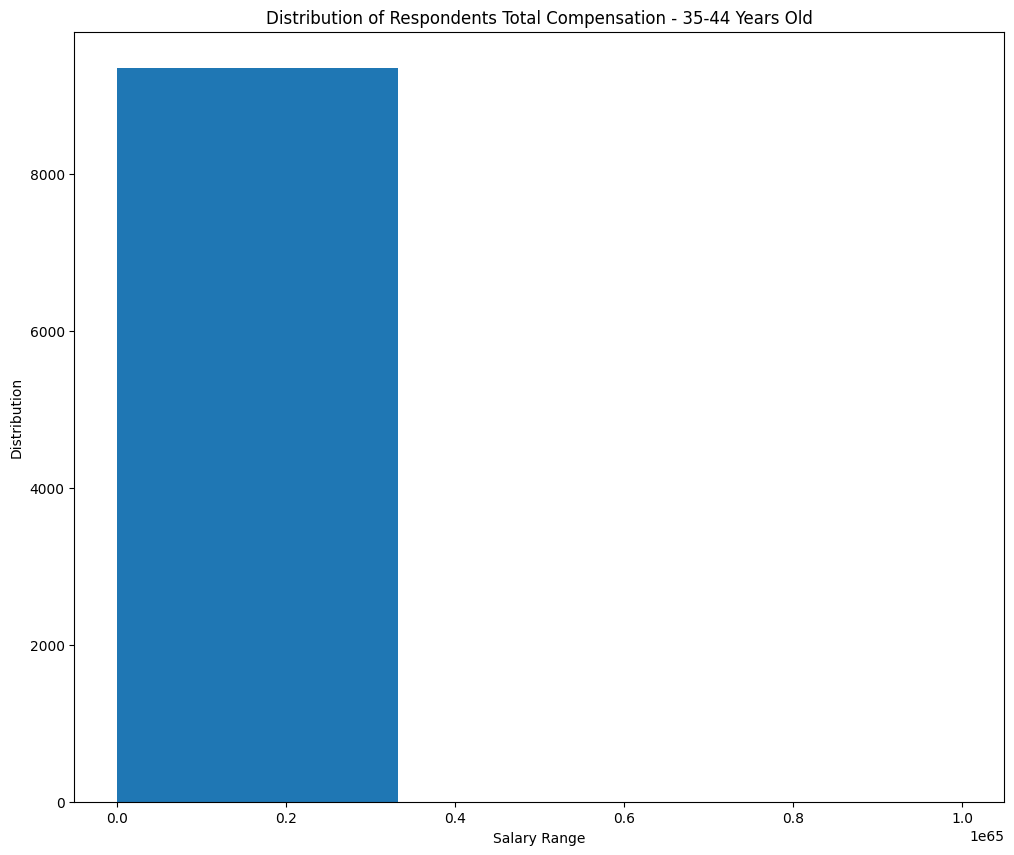

In [93]:
QUERY6 = """
SELECT CompTotal, Age 
FROM main 
WHERE CompTotal is NOT NULL 
AND AGE == '35-44 years old'
""" 

df6 = pd.read_sql_query(QUERY6, conn) 

print (df6.head())

plt.figure(figsize = (12,10)) 
plt.hist(df6['CompTotal'], bins = 3) 

plt.xlabel("Salary Range") 
plt.ylabel("Distribution") 
plt.title("Distribution of Respondents Total Compensation - 35-44 Years Old") 
plt.show()

   CompTotal              Age
0    95000.0  45-54 years old
1   195000.0  45-54 years old
2   145000.0  45-54 years old
3   115000.0  45-54 years old
4   300000.0  45-54 years old


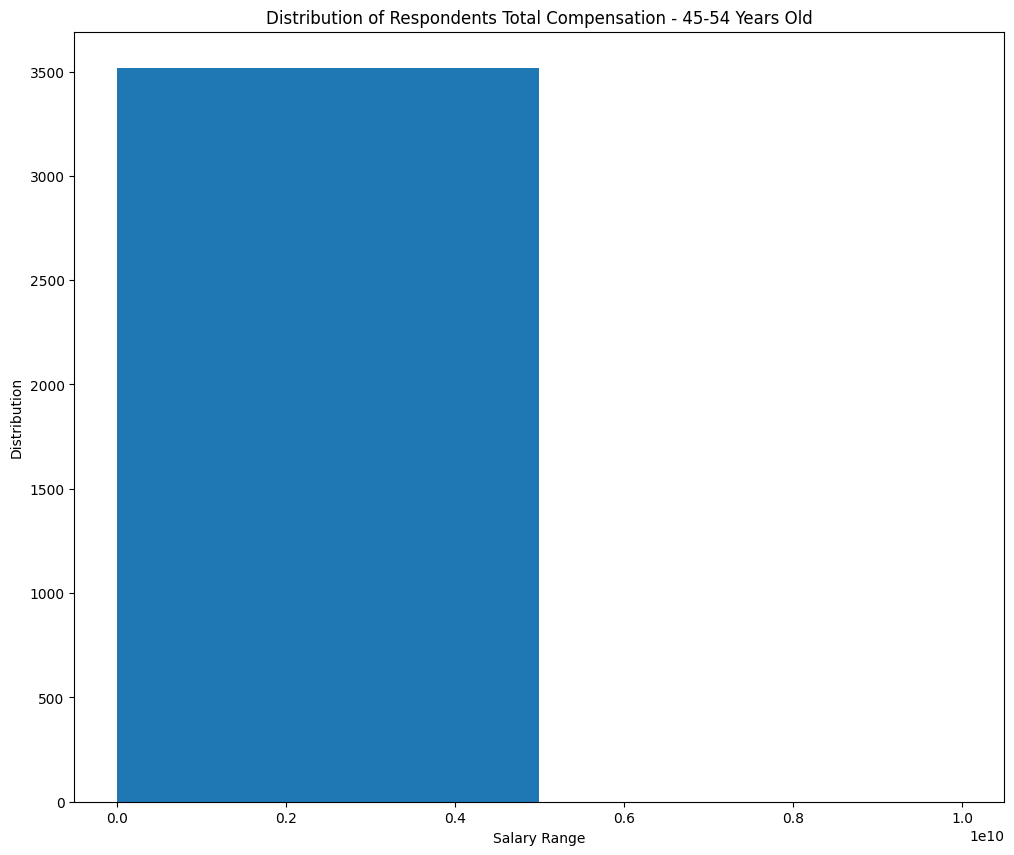

In [94]:
QUERY7 = """
SELECT CompTotal, Age 
FROM main 
WHERE CompTotal is NOT NULL 
AND Age == '45-54 years old'
""" 

df7 = pd.read_sql_query(QUERY7, conn) 

print (df7.head())

plt.figure(figsize = (12,10)) 
plt.hist(df7['CompTotal'], bins = 2) 

plt.xlabel("Salary Range") 
plt.ylabel("Distribution") 
plt.title("Distribution of Respondents Total Compensation - 45-54 Years Old") 
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


          TimeSearching              Age
0   30-60 minutes a day  18-24 years old
1   30-60 minutes a day  18-24 years old
2   15-30 minutes a day  18-24 years old
3  60-120 minutes a day  18-24 years old
4   15-30 minutes a day  18-24 years old


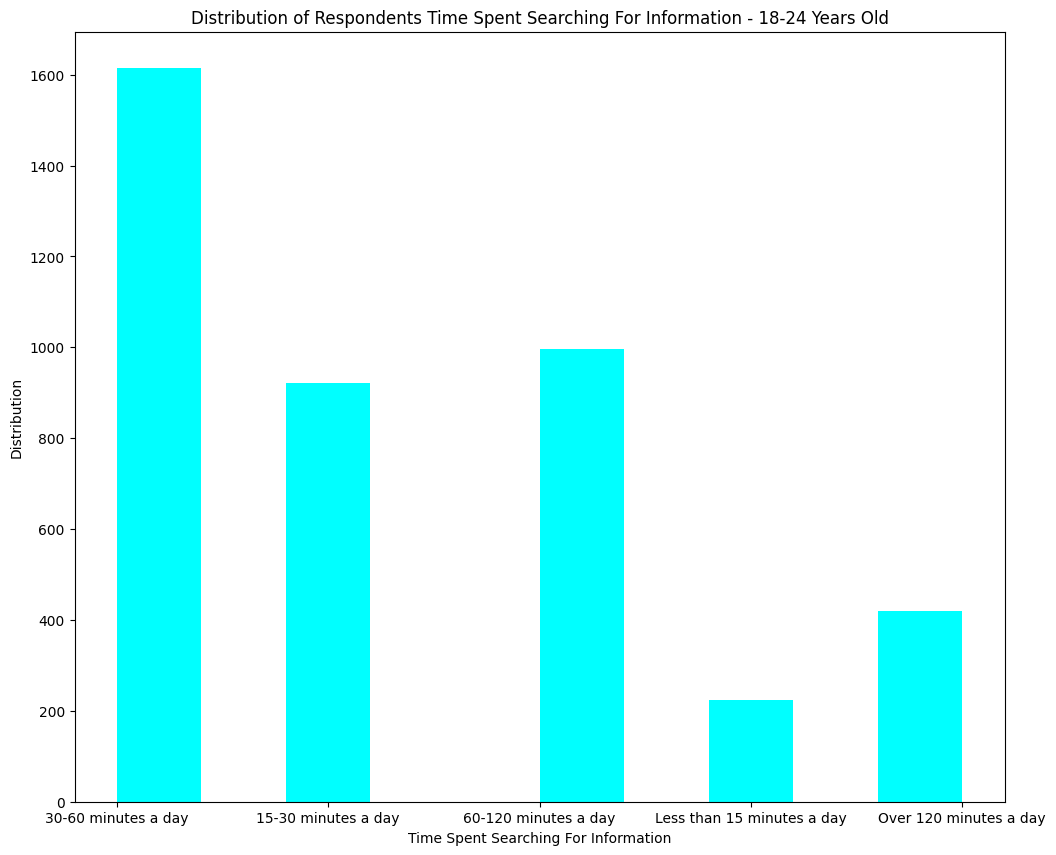

In [95]:
QUERY8 = """
SELECT TimeSearching, Age 
FROM main 
WHERE TimeSearching is NOT NULL 
AND Age == '18-24 years old'
""" 

df8 = pd.read_sql_query(QUERY8, conn) 

print (df8.head())

plt.figure(figsize = (12,10)) 
plt.hist(df8['TimeSearching'], bins = 10, color = "cyan") 

plt.xlabel("Time Spent Searching For Information") 
plt.ylabel("Distribution") 
plt.title("Distribution of Respondents Time Spent Searching For Information - 18-24 Years Old") 
plt.show()

                TimeSearching              Age
0         15-30 minutes a day  25-34 years old
1  Less than 15 minutes a day  25-34 years old
2        60-120 minutes a day  25-34 years old
3        60-120 minutes a day  25-34 years old
4         30-60 minutes a day  25-34 years old


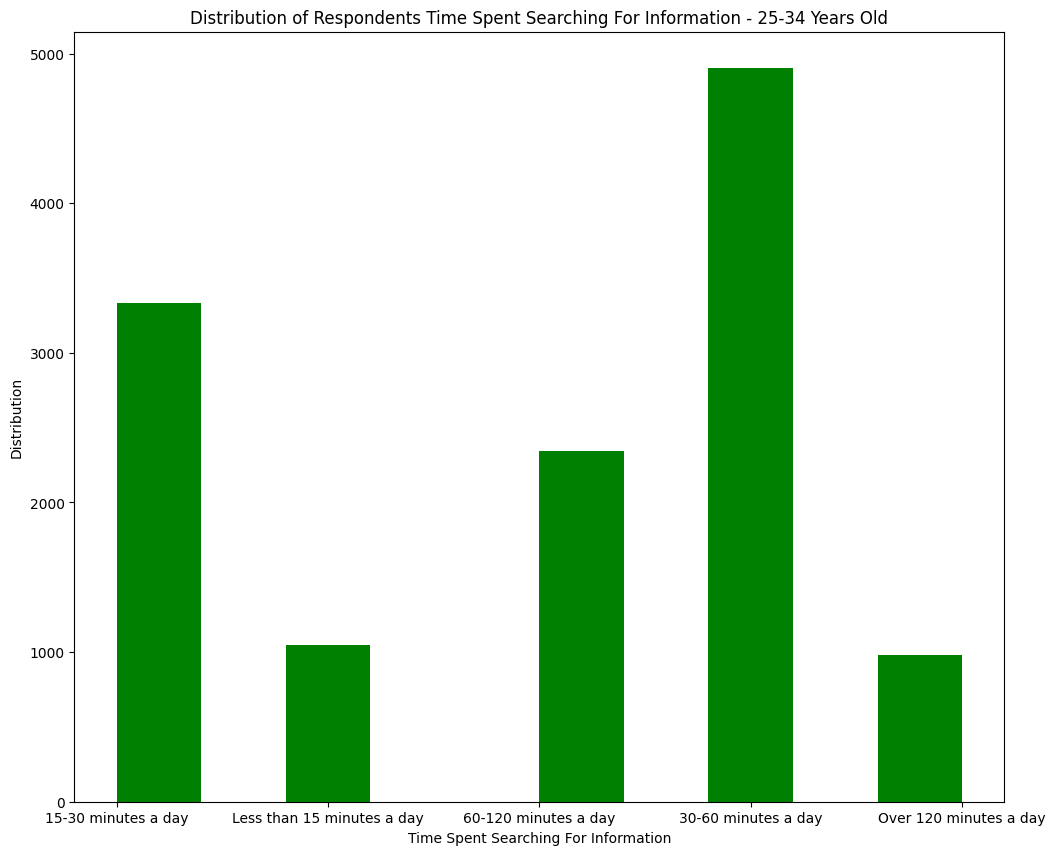

In [96]:
QUERY9 = """
SELECT TimeSearching, Age 
FROM main 
WHERE TimeSearching is NOT NULL 
AND Age == '25-34 years old'
""" 

df9 = pd.read_sql_query(QUERY9, conn) 

print (df9.head())

plt.figure(figsize = (12,10)) 
plt.hist(df9['TimeSearching'], bins = 10, color = "green") 

plt.xlabel("Time Spent Searching For Information") 
plt.ylabel("Distribution") 
plt.title("Distribution of Respondents Time Spent Searching For Information - 25-34 Years Old") 
plt.show()

          TimeSearching              Age
0   30-60 minutes a day  35-44 years old
1   30-60 minutes a day  35-44 years old
2   15-30 minutes a day  35-44 years old
3   30-60 minutes a day  35-44 years old
4  60-120 minutes a day  35-44 years old


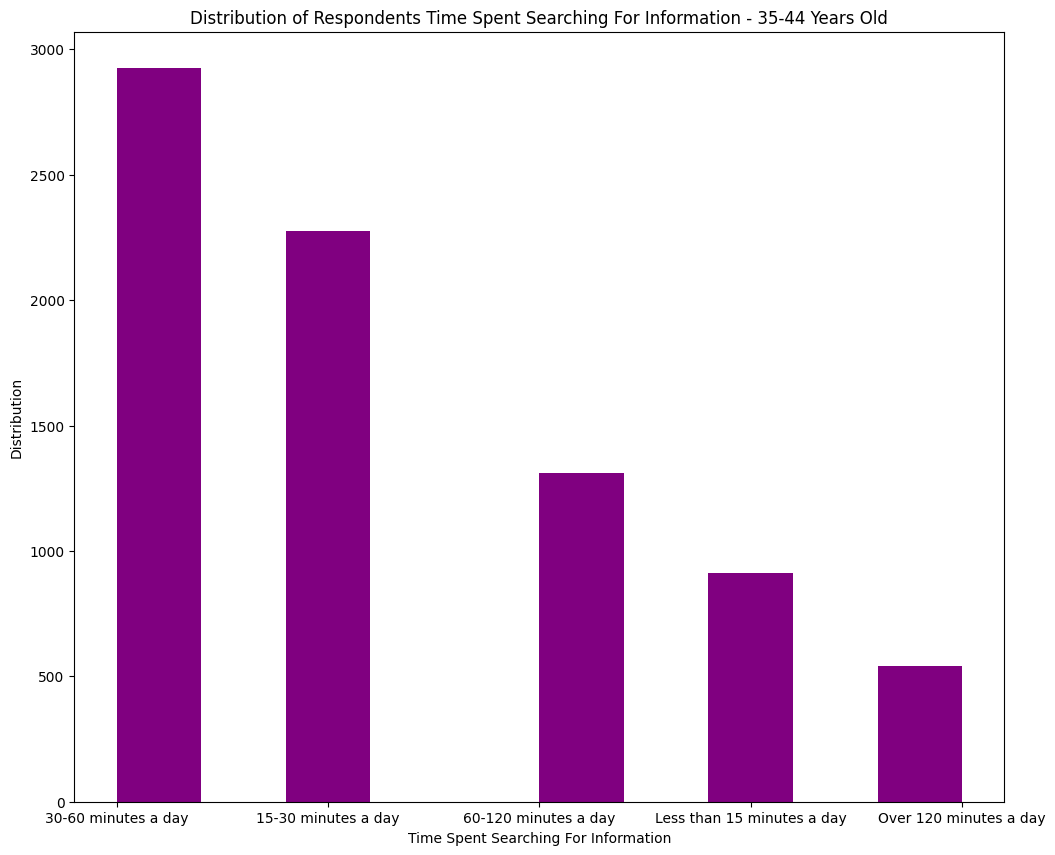

In [97]:
QUERY10 = """
SELECT TimeSearching, Age 
FROM main 
WHERE TimeSearching is NOT NULL 
AND Age == '35-44 years old'
""" 

df10 = pd.read_sql_query(QUERY10, conn) 

print (df10.head())

plt.figure(figsize = (12,10)) 
plt.hist(df10['TimeSearching'], bins = 10, color = "purple") 

plt.xlabel("Time Spent Searching For Information") 
plt.ylabel("Distribution") 
plt.title("Distribution of Respondents Time Spent Searching For Information - 35-44 Years Old") 
plt.show()

                TimeSearching              Age
0        60-120 minutes a day  45-54 years old
1        60-120 minutes a day  45-54 years old
2  Less than 15 minutes a day  45-54 years old
3         15-30 minutes a day  45-54 years old
4        60-120 minutes a day  45-54 years old


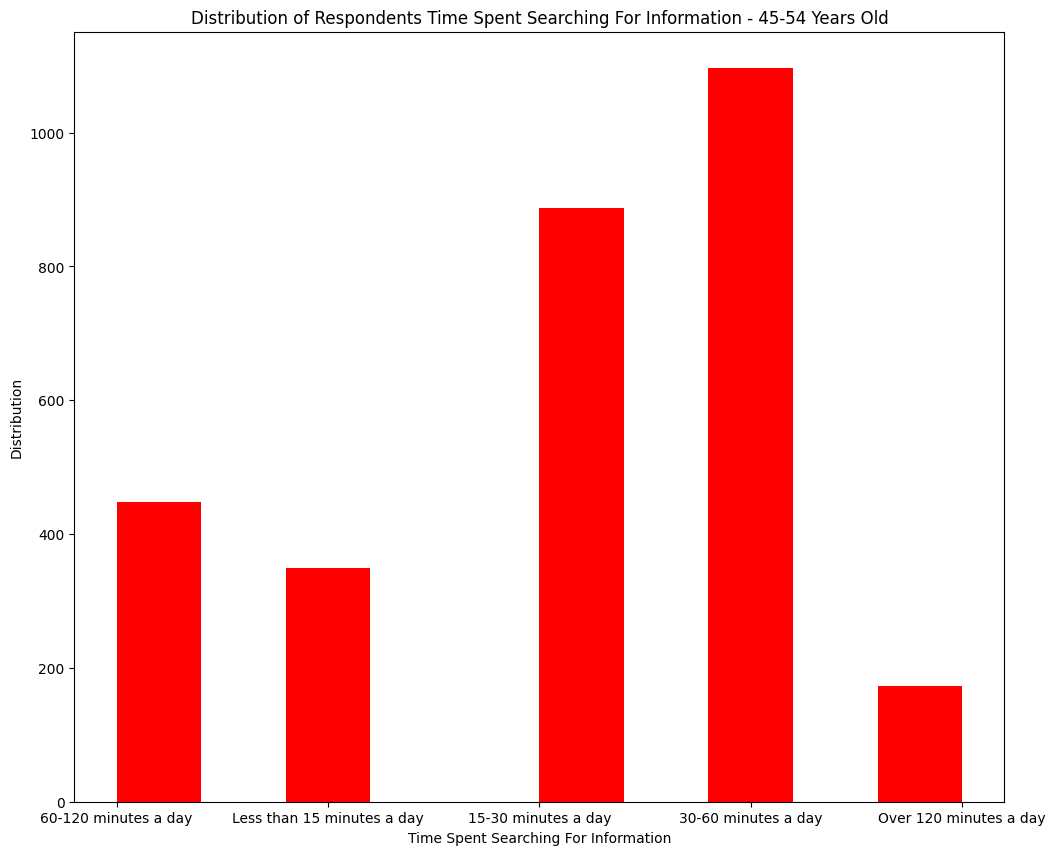

In [98]:
QUERY11 = """
SELECT TimeSearching, Age 
FROM main 
WHERE TimeSearching is NOT NULL 
AND Age == '45-54 years old'
""" 

df11 = pd.read_sql_query(QUERY11, conn) 

print (df11.head())

plt.figure(figsize = (12,10)) 
plt.hist(df11['TimeSearching'], bins = 10, color = 'red') 

plt.xlabel("Time Spent Searching For Information") 
plt.ylabel("Distribution") 
plt.title("Distribution of Respondents Time Spent Searching For Information - 45-54 Years Old") 
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


  DatabaseWantToWorkWith  count
0             PostgreSQL   3738
1      PostgreSQL;SQLite   1533
2                 SQLite   1476
3   Microsoft SQL Server   1431
4                  MySQL   1139


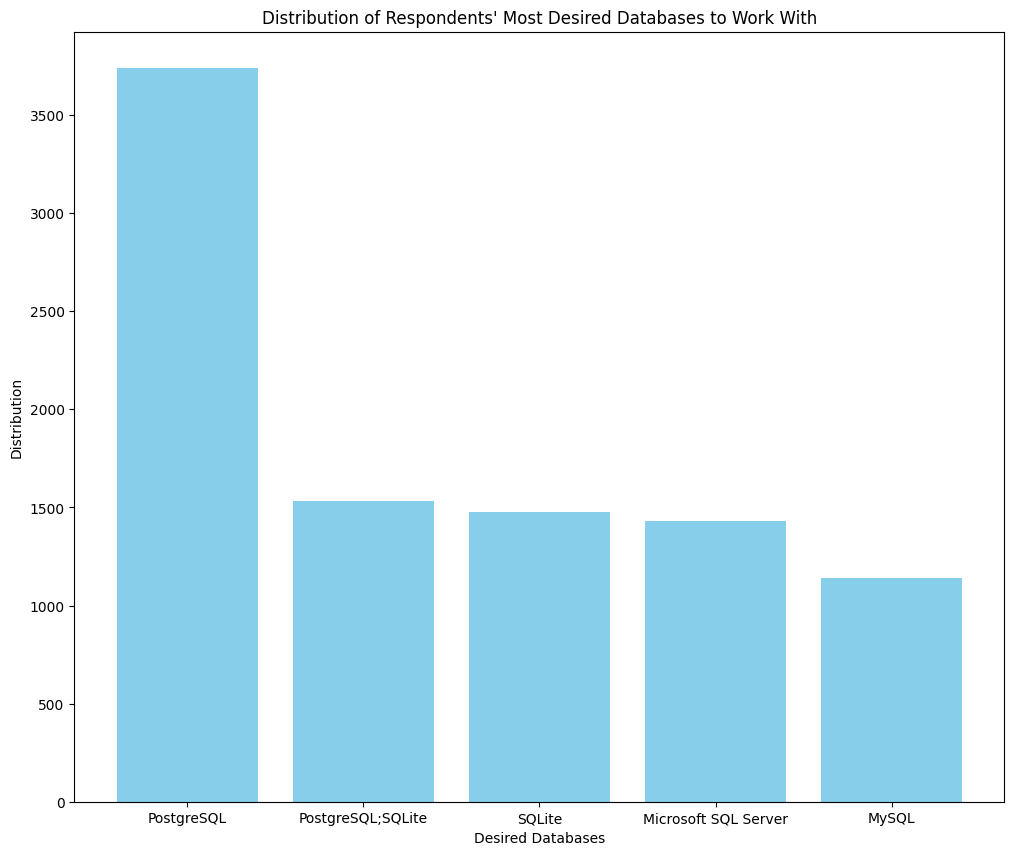

In [99]:
top_5 = """
SELECT DatabaseWantToWorkWith, Count(*) 
AS count 
FROM main 
WHERE DatabaseWantToWorkWith IS NOT NULL 
GROUP BY DatabaseWantToWorkWith 
ORDER BY count DESC 
LIMIT 5
"""

df12 = pd.read_sql_query(top_5, conn) 

print (df12.head())

plt.figure(figsize = (12,10)) 
plt.bar(df12['DatabaseWantToWorkWith'], df12['count'], color = 'skyblue') 

plt.xlabel("Desired Databases") 
plt.ylabel("Distribution") 
plt.title("Distribution of Respondents' Most Desired Databases to Work With") 
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


                             RemoteWork  count
0  Hybrid (some remote, some in-person)  23015
1                             In-person  10960
2                                Remote  20831


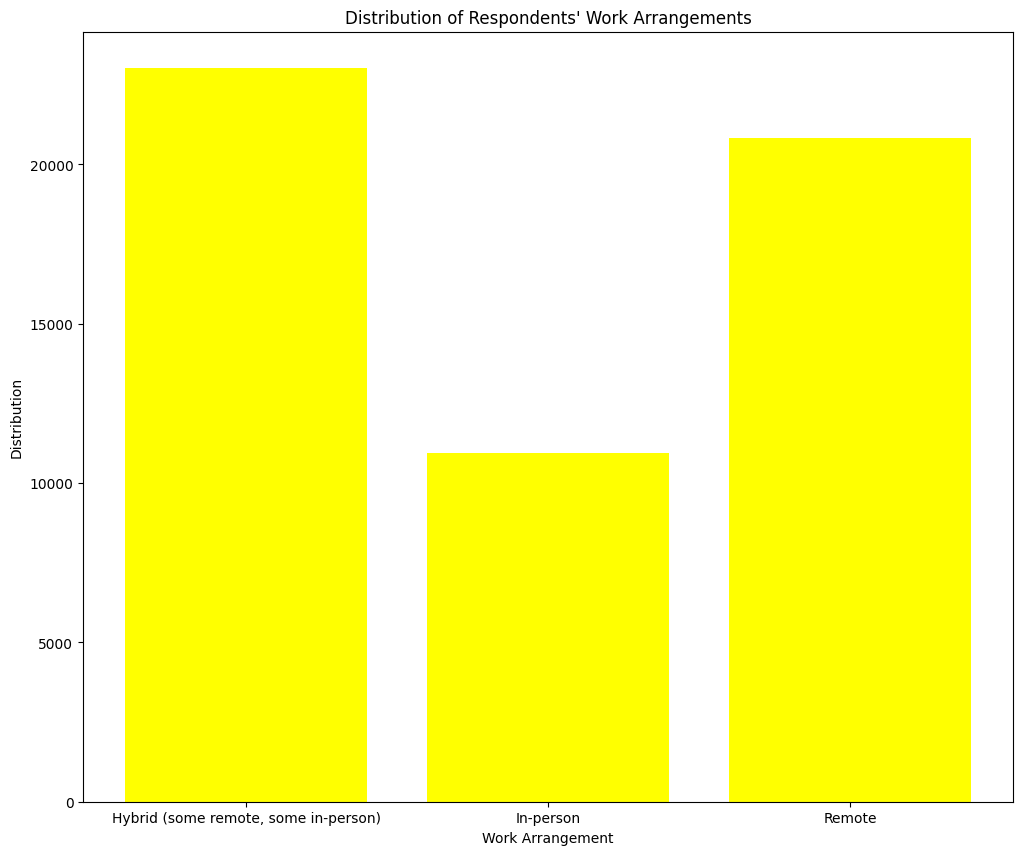

In [100]:
RemoteWork = """
SELECT RemoteWork, Count(*) 
AS count 
FROM main 
WHERE RemoteWork IS NOT NULL 
GROUP BY RemoteWork
"""

df13 = pd.read_sql_query(RemoteWork, conn) 

print (df13.head())

plt.figure(figsize = (12,10)) 
plt.bar(df13['RemoteWork'], df13['count'], color = 'yellow') 

plt.xlabel("Work Arrangement") 
plt.ylabel("Distribution") 
plt.title("Distribution of Respondents' Work Arrangements") 
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


   CompTotal
0    95000.0
1   195000.0
2    54000.0
3   145000.0
4    80000.0


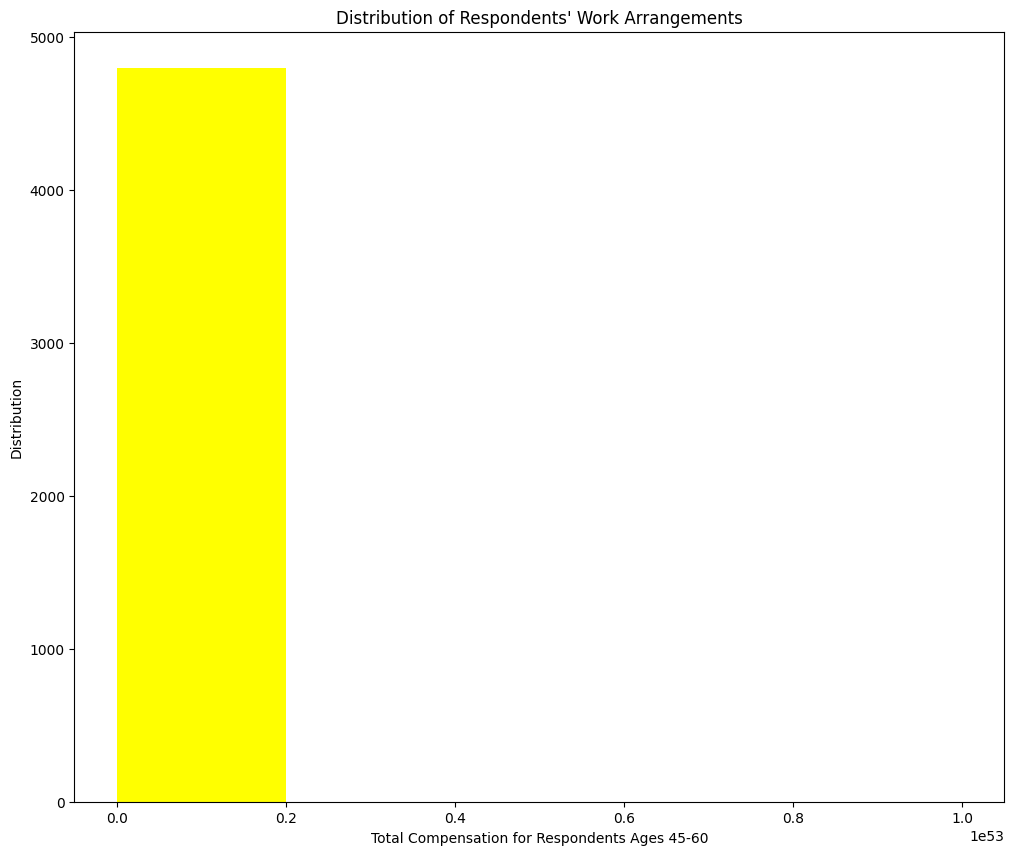

In [111]:
CompTotal_1 = """
SELECT CompTotal 
FROM main 
WHERE CompTotal IS NOT NULL
AND (Age == '45-54 years old' OR Age == '55-64 years old')
"""

df14 = pd.read_sql_query(CompTotal_1, conn)

print (df14.head())

plt.figure(figsize = (12,10)) 
plt.hist(df14, bins = 5, color = 'yellow') 

plt.xlabel("Total Compensation for Respondents Ages 45-60") 
plt.ylabel("Distribution") 
plt.title("Distribution of Respondents' Work Arrangements") 
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


JobSat  YearsCodePro      
2.0     11                    1
        31                    1
4.0     15                    1
        20                    1
        37                    1
        42                    1
5.0     22                    1
        27                    1
        40                    1
        44                    1
6.0     16                    1
        2                     1
        21                    1
        25                    1
        Less than 1 year      1
7.0     17                    1
        23                    1
        29                    1
        3                     1
        30                    1
        4                     1
        45                    1
        48                    1
        50                    1
        6                     1
        7                     1
        8                     1
        9                     1
8.0     12                    1
        19                    1
        24   

ConversionError: Failed to convert value(s) to axis units: array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39',
       '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '5', '50', '6', '7', '8', '9', 'Less than 1 year',
       'More than 50 years'], dtype=object)

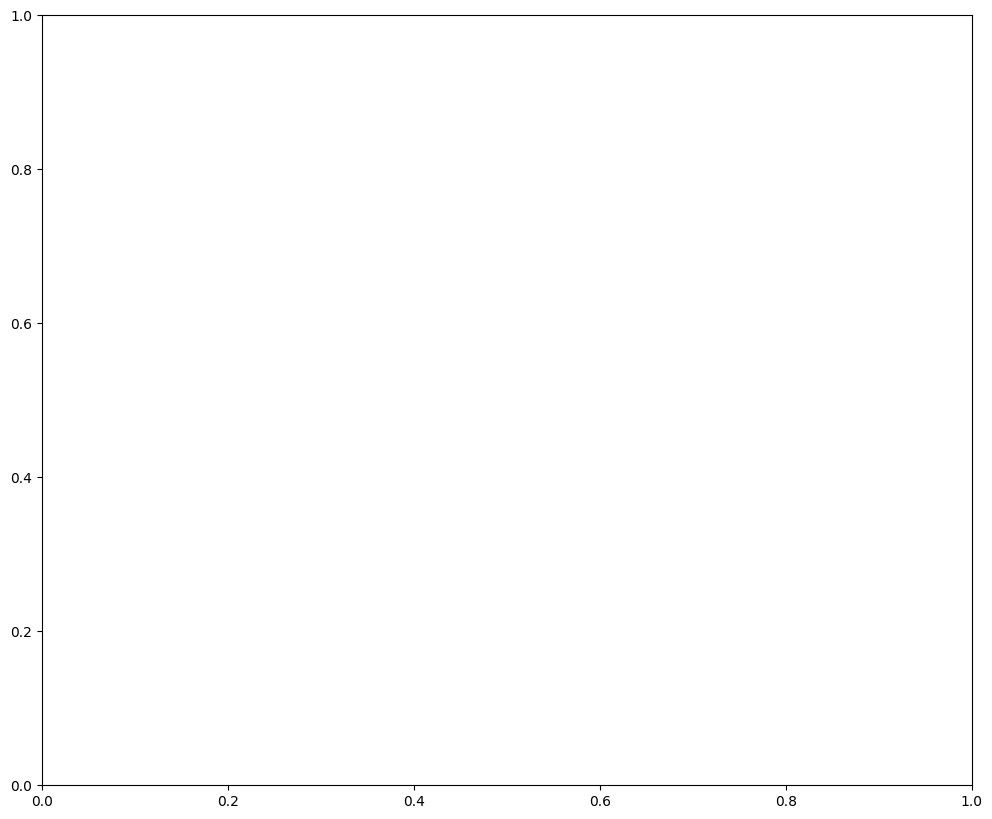

In [121]:
JobSat_query = """
SELECT JobSat, YearsCodePro 
FROM main
WHERE JobSat IS NOT NULL
AND YearsCodePro IS NOT NULL
GROUP BY YearsCodePro 
""" 

df15 = pd.read_sql_query(JobSat_query, conn) 

experience_mapping = { 
    "Less than 1 year": 0.5, 
    "More than 50 years": 51
} 

df15['YearsCodePro'] = df['YearsCodePro'].replace(experience_mapping)

df15['YearsCodePro']=pd.to_numeric(df['YearsCodePr

plt.figure(figsize = (12,10)) 
plt.hist(df15, bins = 1000, color = "magenta") 

plt.xlabel("Job Satisfaction by Years of Professional Coding Experience") 
plt.ylabel("Distribution") 
plt.title("Job Satisfaction by Years of Professional Coding Experience")

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [79]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
